In [1]:
import pandas as pd

In [51]:
df = pd.read_table("/Users/korzeniewski/Downloads/dane3.txt")

In [52]:
columns = df.columns
df.reset_index(inplace=True)

In [53]:
columns

Index(['acc_x', 'acc_y', 'acc_z', 'mag', 'dif_x', 'dif_y', 'dif_z',
       'diff_mag'],
      dtype='object')

In [55]:
df = df.iloc[:,:-1]
df.columns = columns
df.head()

,acc_x,acc_y,acc_z,mag,dif_x,dif_y,dif_z,diff_mag
0,0.01,-0.01,0.11,0.11,236.8,216.8,3586.4,3600.74
1,0.02,-0.01,0.21,0.22,299.2,249.6,3586.4,3607.50
2,0.01,-0.01,0.33,0.33,351.2,336.8,3827.2,3858.01
3,0.03,-0.02,0.43,0.43,796.0,604.8,3827.2,3955.61
4,0.03,-0.02,0.54,0.54,796.0,604.8,3896.0,4022.22


<AxesSubplot:>

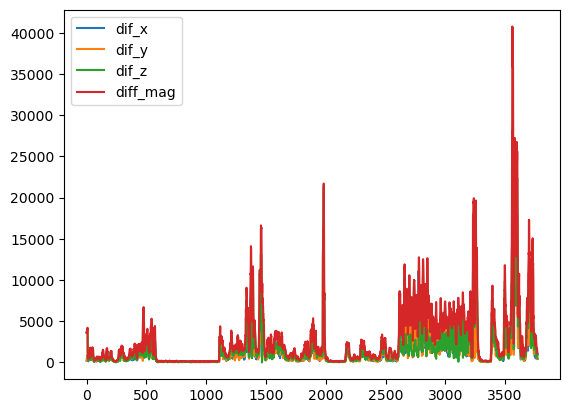

In [56]:
df.iloc[:,4:].plot()

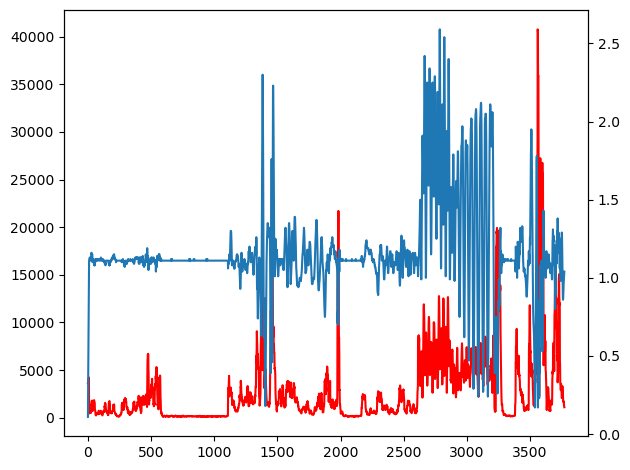

In [59]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax1.plot(df.diff_mag, color = 'r')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(df.mag)
ax2.tick_params(axis='y')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [15]:
import scipy.signal as sc
import numpy as np

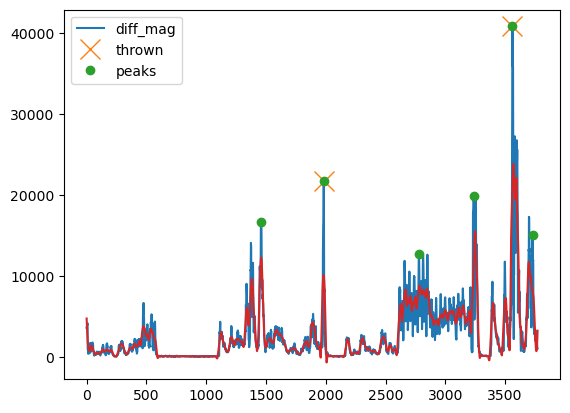

In [85]:
diff_mag = df.diff_mag.to_numpy()

peaks, _ = sc.find_peaks(diff_mag, distance=150, height = 10_000)
np.diff(peaks)

mask = diff_mag[peaks] > 20_000
thrown = peaks[mask]

plt.plot(diff_mag)
plt.plot(thrown, diff_mag[thrown], "x", markersize=14)
plt.plot(peaks, diff_mag[peaks], "o")

plt.legend(['diff_mag', 'thrown', 'peaks'])
plt.show()


In [72]:
x[peaks]

array([16638.5 , 21711.3 , 12766.02, 19924.67, 40771.33, 15071.02])

In [65]:
peaks

array([1458, 1982, 2779, 3238, 3560, 3730])

In [67]:
mask = x[peaks] > 15_000


In [68]:
peaks

array([1458, 1982, 2779, 3238, 3560, 3730])

In [69]:
peaks[mask]

array([1458, 1982, 3238, 3560, 3730])